## 1. pobieranie bibliotek

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Lista kodów produktów o których zostały pobrane

In [2]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

84514582


## 3. Wyczytwanie opinii o wskazanym produkcie

In [3]:
product_id = input("Podaj kod produktu z Ceneo.pl: ")
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",",".")).astype(float)

## 4. Podstawowe statystyki

In [4]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()


## 5. Histogram ocen produktów

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


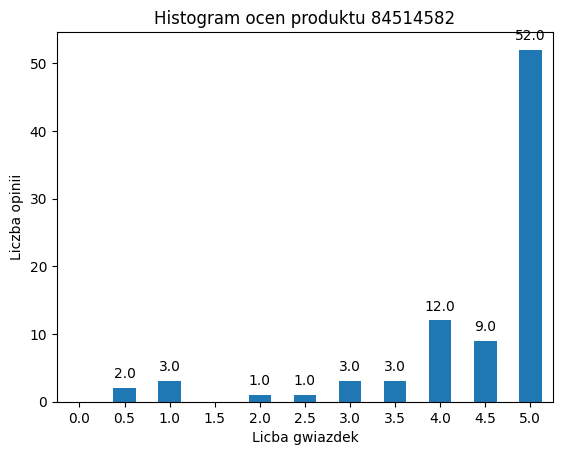

In [5]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5))
rating_distribution.plot.bar()
plt.title(f"Histogram ocen produktu {product_id}")
plt.xlabel("Licba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
for index, value in enumerate(rating_distribution):
    plt.text(index, value+1.5, str(value), ha="center")

## 6. wykres udziału rekomendacji w opisach produktów

Text(0.5, 1.0, 'Udział rekomendacji w opiniaach o produkcie 84514582')

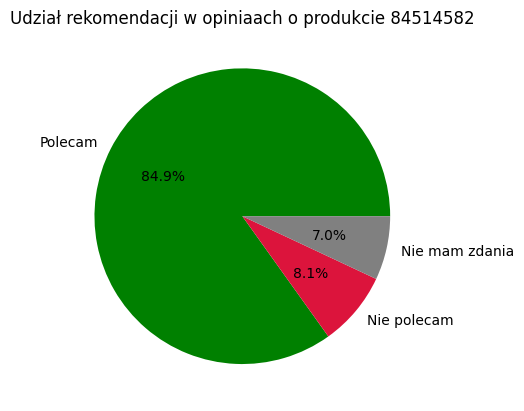

In [6]:
recomendation_distributions = opinions.recommandation.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recomendation_distributions.plot.pie(
    label = "",
    autopct = lambda r: f"{r:1.1f}%" if r>0 else "",
    labels = ["Polecam", "Nie polecam", "Nie mam zdania"], 
    colors = ["green", "crimson", "grey"]
)

plt.title(f"Udział rekomendacji w opiniaach o produkcie {product_id}")

In [11]:
stats = {
    "product_id": product_id,
    "opinions_count": opinions_count,
    "pros_count": int(pros_count),
    "cons_count": int(cons_count),
    "average_rating": average_rating,
    "rating_distribution": rating_distribution.to_dict(),
    "recommendation_distribution": recomendation_distributions.to_dict()
}

In [16]:
if not os.path.exists("stats"):
    os.mkdir("stats")
with open(f"opinions/{product_id}.json", "w", encoding="UTF-8") as if:
    json.dump(stats, jf, indent=4, ensure_ascii=False)


SyntaxError: invalid syntax (1905628957.py, line 3)